# 프로젝트: ResNet Ablation Study

## 1. ResNet 기본 블록 구성하기

**ResNet-34**와  **ResNet-50**  네트워크를 직접 만든다고 생각해봅시다. 우선 ResNet-34와 ResNet-50에서 사용되는 블록의 공통점을 찾고 차이점을 찾아봅시다.

[Deep Residual Learning for Image Recognition(paper)](https://arxiv.org/pdf/1512.03385.pdf)
<br></br>
![](https://aiffelstaticprd.blob.core.windows.net/media/images/GC-1-P-table1.max-800x600.png)
<br></br>
ResNet-34 와 ResNet-50 은 모두 conv block 이라고 불리는 블록 구조를 각각 3, 4, 6, 3 개씩 반복해서 쌓은 형태라는 공통점을 가지고 있지만 ResNet - 34 의 경우 Block은 3x3 kernel 인 Convolution layer 로만 구성되어있지만, ResNet-50 은 1 x 1 Convolution 이 앞뒤로 붙어 더 많은 레이어를 한 블록 내에 가지게 된다.
<br></br>

## 2. ResNet - 34, ResNet - 50 Complete Model

### ResNet-34

VGG와 같이 블록을 만드는 함수를 사용해서 직접 전체 모델을 만들어 봅시다. ResNet-34와 ResNet-50의 차이에 따라 달라지는 구성(configuration)을 함수에 전달해서 같은 생성 함수  `build_resnet()`를 통해서 ResNet의 여러가지 버전들을 모두 만들어 낼 수 있도록 해야 합니다.

다음의 코드를 실행하면,
<br></br>
```python
resnet_34 = build_resnet(input_shape=(32, 32,3), is_50=False)
resnet_34.summary()
```
<br></br>
아래와 같은 결과가 나와야합니다.
```python
Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_layer (InputLayer)        [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 16, 16, 64)   9472        input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 16, 16, 64)   256         conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_568 (Activation)     (None, 16, 16, 64)   0           batch_normalization_13[0][0]     
__________________________________________________________________________________________________
stage2_0_maxpooling (MaxPooling (None, 8, 8, 64)     0           activation_568[0][0]             
__________________________________________________________________________________________________
stage2_1_conv1 (Conv2D)         (None, 8, 8, 64)     36928       stage2_0_maxpooling[0][0]        
__________________________________________________________________________________________________
stage2_1_bn1 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_569 (Activation)     (None, 8, 8, 64)     0           stage2_1_bn1[0][0]               
__________________________________________________________________________________________________
stage2_1_conv2 (Conv2D)         (None, 8, 8, 64)     36928       activation_569[0][0]             
__________________________________________________________________________________________________
stage2_1_bn2 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_1_conv2[0][0]             
__________________________________________________________________________________________________
stage2_1_add (Add)              (None, 8, 8, 64)     0           stage2_1_bn2[0][0]               
                                                                 stage2_0_maxpooling[0][0]        
__________________________________________________________________________________________________
activation_570 (Activation)     (None, 8, 8, 64)     0           stage2_1_add[0][0]               
__________________________________________________________________________________________________
stage2_2_conv1 (Conv2D)         (None, 8, 8, 64)     36928       activation_570[0][0]             
__________________________________________________________________________________________________
stage2_2_bn1 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_571 (Activation)     (None, 8, 8, 64)     0           stage2_2_bn1[0][0]               
__________________________________________________________________________________________________
stage2_2_conv2 (Conv2D)         (None, 8, 8, 64)     36928       activation_571[0][0]             
__________________________________________________________________________________________________
stage2_2_bn2 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_2_conv2[0][0]             
__________________________________________________________________________________________________
stage2_2_add (Add)              (None, 8, 8, 64)     0           stage2_2_bn2[0][0]               
                                                                 activation_570[0][0]             
__________________________________________________________________________________________________
activation_572 (Activation)     (None, 8, 8, 64)     0           stage2_2_add[0][0]               
__________________________________________________________________________________________________
stage2_3_conv1 (Conv2D)         (None, 8, 8, 64)     36928       activation_572[0][0]             
__________________________________________________________________________________________________
stage2_3_bn1 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_573 (Activation)     (None, 8, 8, 64)     0           stage2_3_bn1[0][0]               
__________________________________________________________________________________________________
stage2_3_conv2 (Conv2D)         (None, 8, 8, 64)     36928       activation_573[0][0]             
__________________________________________________________________________________________________
stage2_3_bn2 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_3_conv2[0][0]             
__________________________________________________________________________________________________
stage2_3_add (Add)              (None, 8, 8, 64)     0           stage2_3_bn2[0][0]               
                                                                 activation_572[0][0]             
__________________________________________________________________________________________________
activation_574 (Activation)     (None, 8, 8, 64)     0           stage2_3_add[0][0]               
__________________________________________________________________________________________________
stage3_1_conv1 (Conv2D)         (None, 4, 4, 128)    73856       activation_574[0][0]             
__________________________________________________________________________________________________
stage3_1_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_575 (Activation)     (None, 4, 4, 128)    0           stage3_1_bn1[0][0]               
__________________________________________________________________________________________________
stage3_1_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_575[0][0]             
__________________________________________________________________________________________________
stage3_1_short (Conv2D)         (None, 4, 4, 128)    8320        activation_574[0][0]             
__________________________________________________________________________________________________
stage3_1_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_1_conv2[0][0]             
__________________________________________________________________________________________________
stage3_1_bn4 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_1_short[0][0]             
__________________________________________________________________________________________________
stage3_1_add (Add)              (None, 4, 4, 128)    0           stage3_1_bn2[0][0]               
                                                                 stage3_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_576 (Activation)     (None, 4, 4, 128)    0           stage3_1_add[0][0]               
__________________________________________________________________________________________________
stage3_2_conv1 (Conv2D)         (None, 4, 4, 128)    147584      activation_576[0][0]             
__________________________________________________________________________________________________
stage3_2_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_577 (Activation)     (None, 4, 4, 128)    0           stage3_2_bn1[0][0]               
__________________________________________________________________________________________________
stage3_2_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_577[0][0]             
__________________________________________________________________________________________________
stage3_2_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_2_conv2[0][0]             
__________________________________________________________________________________________________
stage3_2_add (Add)              (None, 4, 4, 128)    0           stage3_2_bn2[0][0]               
                                                                 activation_576[0][0]             
__________________________________________________________________________________________________
activation_578 (Activation)     (None, 4, 4, 128)    0           stage3_2_add[0][0]               
__________________________________________________________________________________________________
stage3_3_conv1 (Conv2D)         (None, 4, 4, 128)    147584      activation_578[0][0]             
__________________________________________________________________________________________________
stage3_3_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_579 (Activation)     (None, 4, 4, 128)    0           stage3_3_bn1[0][0]               
__________________________________________________________________________________________________
stage3_3_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_579[0][0]             
__________________________________________________________________________________________________
stage3_3_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_3_conv2[0][0]             
__________________________________________________________________________________________________
stage3_3_add (Add)              (None, 4, 4, 128)    0           stage3_3_bn2[0][0]               
                                                                 activation_578[0][0]             
__________________________________________________________________________________________________
activation_580 (Activation)     (None, 4, 4, 128)    0           stage3_3_add[0][0]               
__________________________________________________________________________________________________
stage3_4_conv1 (Conv2D)         (None, 4, 4, 128)    147584      activation_580[0][0]             
__________________________________________________________________________________________________
stage3_4_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_4_conv1[0][0]             
__________________________________________________________________________________________________
activation_581 (Activation)     (None, 4, 4, 128)    0           stage3_4_bn1[0][0]               
__________________________________________________________________________________________________
stage3_4_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_581[0][0]             
__________________________________________________________________________________________________
stage3_4_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_4_conv2[0][0]             
__________________________________________________________________________________________________
stage3_4_add (Add)              (None, 4, 4, 128)    0           stage3_4_bn2[0][0]               
                                                                 activation_580[0][0]             
__________________________________________________________________________________________________
activation_582 (Activation)     (None, 4, 4, 128)    0           stage3_4_add[0][0]               
__________________________________________________________________________________________________
stage4_1_conv1 (Conv2D)         (None, 2, 2, 256)    295168      activation_582[0][0]             
__________________________________________________________________________________________________
stage4_1_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_583 (Activation)     (None, 2, 2, 256)    0           stage4_1_bn1[0][0]               
__________________________________________________________________________________________________
stage4_1_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_583[0][0]             
__________________________________________________________________________________________________
stage4_1_short (Conv2D)         (None, 2, 2, 256)    33024       activation_582[0][0]             
__________________________________________________________________________________________________
stage4_1_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_1_conv2[0][0]             
__________________________________________________________________________________________________
stage4_1_bn4 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_1_short[0][0]             
__________________________________________________________________________________________________
stage4_1_add (Add)              (None, 2, 2, 256)    0           stage4_1_bn2[0][0]               
                                                                 stage4_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_584 (Activation)     (None, 2, 2, 256)    0           stage4_1_add[0][0]               
__________________________________________________________________________________________________
stage4_2_conv1 (Conv2D)         (None, 2, 2, 256)    590080      activation_584[0][0]             
__________________________________________________________________________________________________
stage4_2_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_585 (Activation)     (None, 2, 2, 256)    0           stage4_2_bn1[0][0]               
__________________________________________________________________________________________________
stage4_2_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_585[0][0]             
__________________________________________________________________________________________________
stage4_2_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_2_conv2[0][0]             
__________________________________________________________________________________________________
stage4_2_add (Add)              (None, 2, 2, 256)    0           stage4_2_bn2[0][0]               
                                                                 activation_584[0][0]             
__________________________________________________________________________________________________
activation_586 (Activation)     (None, 2, 2, 256)    0           stage4_2_add[0][0]               
__________________________________________________________________________________________________
stage4_3_conv1 (Conv2D)         (None, 2, 2, 256)    590080      activation_586[0][0]             
__________________________________________________________________________________________________
stage4_3_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_587 (Activation)     (None, 2, 2, 256)    0           stage4_3_bn1[0][0]               
__________________________________________________________________________________________________
stage4_3_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_587[0][0]             
__________________________________________________________________________________________________
stage4_3_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_3_conv2[0][0]             
__________________________________________________________________________________________________
stage4_3_add (Add)              (None, 2, 2, 256)    0           stage4_3_bn2[0][0]               
                                                                 activation_586[0][0]             
__________________________________________________________________________________________________
activation_588 (Activation)     (None, 2, 2, 256)    0           stage4_3_add[0][0]               
__________________________________________________________________________________________________
stage4_4_conv1 (Conv2D)         (None, 2, 2, 256)    590080      activation_588[0][0]             
__________________________________________________________________________________________________
stage4_4_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_4_conv1[0][0]             
__________________________________________________________________________________________________
activation_589 (Activation)     (None, 2, 2, 256)    0           stage4_4_bn1[0][0]               
__________________________________________________________________________________________________
stage4_4_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_589[0][0]             
__________________________________________________________________________________________________
stage4_4_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_4_conv2[0][0]             
__________________________________________________________________________________________________
stage4_4_add (Add)              (None, 2, 2, 256)    0           stage4_4_bn2[0][0]               
                                                                 activation_588[0][0]             
__________________________________________________________________________________________________
activation_590 (Activation)     (None, 2, 2, 256)    0           stage4_4_add[0][0]               
__________________________________________________________________________________________________
stage4_5_conv1 (Conv2D)         (None, 2, 2, 256)    590080      activation_590[0][0]             
__________________________________________________________________________________________________
stage4_5_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_5_conv1[0][0]             
__________________________________________________________________________________________________
activation_591 (Activation)     (None, 2, 2, 256)    0           stage4_5_bn1[0][0]               
__________________________________________________________________________________________________
stage4_5_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_591[0][0]             
__________________________________________________________________________________________________
stage4_5_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_5_conv2[0][0]             
__________________________________________________________________________________________________
stage4_5_add (Add)              (None, 2, 2, 256)    0           stage4_5_bn2[0][0]               
                                                                 activation_590[0][0]             
__________________________________________________________________________________________________
activation_592 (Activation)     (None, 2, 2, 256)    0           stage4_5_add[0][0]               
__________________________________________________________________________________________________
stage4_6_conv1 (Conv2D)         (None, 2, 2, 256)    590080      activation_592[0][0]             
__________________________________________________________________________________________________
stage4_6_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_6_conv1[0][0]             
__________________________________________________________________________________________________
activation_593 (Activation)     (None, 2, 2, 256)    0           stage4_6_bn1[0][0]               
__________________________________________________________________________________________________
stage4_6_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_593[0][0]             
__________________________________________________________________________________________________
stage4_6_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_6_conv2[0][0]             
__________________________________________________________________________________________________
stage4_6_add (Add)              (None, 2, 2, 256)    0           stage4_6_bn2[0][0]               
                                                                 activation_592[0][0]             
__________________________________________________________________________________________________
activation_594 (Activation)     (None, 2, 2, 256)    0           stage4_6_add[0][0]               
__________________________________________________________________________________________________
stage5_1_conv1 (Conv2D)         (None, 1, 1, 512)    1180160     activation_594[0][0]             
__________________________________________________________________________________________________
stage5_1_bn1 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_595 (Activation)     (None, 1, 1, 512)    0           stage5_1_bn1[0][0]               
__________________________________________________________________________________________________
stage5_1_conv2 (Conv2D)         (None, 1, 1, 512)    2359808     activation_595[0][0]             
__________________________________________________________________________________________________
stage5_1_short (Conv2D)         (None, 1, 1, 512)    131584      activation_594[0][0]             
__________________________________________________________________________________________________
stage5_1_bn2 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_1_conv2[0][0]             
__________________________________________________________________________________________________
stage5_1_bn4 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_1_short[0][0]             
__________________________________________________________________________________________________
stage5_1_add (Add)              (None, 1, 1, 512)    0           stage5_1_bn2[0][0]               
                                                                 stage5_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_596 (Activation)     (None, 1, 1, 512)    0           stage5_1_add[0][0]               
__________________________________________________________________________________________________
stage5_2_conv1 (Conv2D)         (None, 1, 1, 512)    2359808     activation_596[0][0]             
__________________________________________________________________________________________________
stage5_2_bn1 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_597 (Activation)     (None, 1, 1, 512)    0           stage5_2_bn1[0][0]               
__________________________________________________________________________________________________
stage5_2_conv2 (Conv2D)         (None, 1, 1, 512)    2359808     activation_597[0][0]             
__________________________________________________________________________________________________
stage5_2_bn2 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_2_conv2[0][0]             
__________________________________________________________________________________________________
stage5_2_add (Add)              (None, 1, 1, 512)    0           stage5_2_bn2[0][0]               
                                                                 activation_596[0][0]             
__________________________________________________________________________________________________
activation_598 (Activation)     (None, 1, 1, 512)    0           stage5_2_add[0][0]               
__________________________________________________________________________________________________
stage5_3_conv1 (Conv2D)         (None, 1, 1, 512)    2359808     activation_598[0][0]             
__________________________________________________________________________________________________
stage5_3_bn1 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_599 (Activation)     (None, 1, 1, 512)    0           stage5_3_bn1[0][0]               
__________________________________________________________________________________________________
stage5_3_conv2 (Conv2D)         (None, 1, 1, 512)    2359808     activation_599[0][0]             
__________________________________________________________________________________________________
stage5_3_bn2 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_3_conv2[0][0]             
__________________________________________________________________________________________________
stage5_3_add (Add)              (None, 1, 1, 512)    0           stage5_3_bn2[0][0]               
                                                                 activation_598[0][0]             
__________________________________________________________________________________________________
activation_600 (Activation)     (None, 1, 1, 512)    0           stage5_3_add[0][0]               
__________________________________________________________________________________________________
avg_pool (AveragePooling2D)     (None, 1, 1, 512)    0           activation_600[0][0]             
__________________________________________________________________________________________________
flatten_11 (Flatten)            (None, 512)          0           avg_pool[0][0]                   
__________________________________________________________________________________________________
fc1000 (Dense)                  (None, 10)           5130        flatten_11[0][0]                 
==================================================================================================
Total params: 21,315,338
Trainable params: 21,298,314
Non-trainable params: 17,024
_____________________________________________________________________________________________
```
<br></br>
### ResNet-50

위에서 만든 함수에 config를 조절해서 ResNet-50을 만들어 봅니다. 구조가 원하는 대로 만들어졌는지 확인하고 이상이 있다면 수정합니다.

다음의 코드를 실행하면, 
<br></br>
```python
resnet_50 = build_resnet(input_shape=(32, 32,3), is_50=True)
resnet_50.summary()
```
<br></br>
아래의 결과가 나와야 합니다.
```python
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_layer (InputLayer)        [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 16, 16, 64)   9472        input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 16, 16, 64)   256         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_601 (Activation)     (None, 16, 16, 64)   0           batch_normalization_14[0][0]     
__________________________________________________________________________________________________
stage2_0_maxpooling (MaxPooling (None, 8, 8, 64)     0           activation_601[0][0]             
__________________________________________________________________________________________________
stage2_1_conv1 (Conv2D)         (None, 8, 8, 64)     4160        stage2_0_maxpooling[0][0]        
__________________________________________________________________________________________________
stage2_1_bn1 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_602 (Activation)     (None, 8, 8, 64)     0           stage2_1_bn1[0][0]               
__________________________________________________________________________________________________
stage2_1_conv2 (Conv2D)         (None, 8, 8, 64)     36928       activation_602[0][0]             
__________________________________________________________________________________________________
stage2_1_bn2 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_1_conv2[0][0]             
__________________________________________________________________________________________________
activation_603 (Activation)     (None, 8, 8, 64)     0           stage2_1_bn2[0][0]               
__________________________________________________________________________________________________
stage2_1_conv3 (Conv2D)         (None, 8, 8, 256)    16640       activation_603[0][0]             
__________________________________________________________________________________________________
stage2_1_short (Conv2D)         (None, 8, 8, 256)    16640       stage2_0_maxpooling[0][0]        
__________________________________________________________________________________________________
stage2_1_bn3 (BatchNormalizatio (None, 8, 8, 256)    1024        stage2_1_conv3[0][0]             
__________________________________________________________________________________________________
stage2_1_bn4 (BatchNormalizatio (None, 8, 8, 256)    1024        stage2_1_short[0][0]             
__________________________________________________________________________________________________
stage2_1_add (Add)              (None, 8, 8, 256)    0           stage2_1_bn3[0][0]               
                                                                 stage2_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_604 (Activation)     (None, 8, 8, 256)    0           stage2_1_add[0][0]               
__________________________________________________________________________________________________
stage2_2_conv1 (Conv2D)         (None, 8, 8, 64)     16448       activation_604[0][0]             
__________________________________________________________________________________________________
stage2_2_bn1 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_605 (Activation)     (None, 8, 8, 64)     0           stage2_2_bn1[0][0]               
__________________________________________________________________________________________________
stage2_2_conv2 (Conv2D)         (None, 8, 8, 64)     36928       activation_605[0][0]             
__________________________________________________________________________________________________
stage2_2_bn2 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_2_conv2[0][0]             
__________________________________________________________________________________________________
activation_606 (Activation)     (None, 8, 8, 64)     0           stage2_2_bn2[0][0]               
__________________________________________________________________________________________________
stage2_2_conv3 (Conv2D)         (None, 8, 8, 256)    16640       activation_606[0][0]             
__________________________________________________________________________________________________
stage2_2_bn3 (BatchNormalizatio (None, 8, 8, 256)    1024        stage2_2_conv3[0][0]             
__________________________________________________________________________________________________
stage2_2_add (Add)              (None, 8, 8, 256)    0           stage2_2_bn3[0][0]               
                                                                 activation_604[0][0]             
__________________________________________________________________________________________________
activation_607 (Activation)     (None, 8, 8, 256)    0           stage2_2_add[0][0]               
__________________________________________________________________________________________________
stage2_3_conv1 (Conv2D)         (None, 8, 8, 64)     16448       activation_607[0][0]             
__________________________________________________________________________________________________
stage2_3_bn1 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_608 (Activation)     (None, 8, 8, 64)     0           stage2_3_bn1[0][0]               
__________________________________________________________________________________________________
stage2_3_conv2 (Conv2D)         (None, 8, 8, 64)     36928       activation_608[0][0]             
__________________________________________________________________________________________________
stage2_3_bn2 (BatchNormalizatio (None, 8, 8, 64)     256         stage2_3_conv2[0][0]             
__________________________________________________________________________________________________
activation_609 (Activation)     (None, 8, 8, 64)     0           stage2_3_bn2[0][0]               
__________________________________________________________________________________________________
stage2_3_conv3 (Conv2D)         (None, 8, 8, 256)    16640       activation_609[0][0]             
__________________________________________________________________________________________________
stage2_3_bn3 (BatchNormalizatio (None, 8, 8, 256)    1024        stage2_3_conv3[0][0]             
__________________________________________________________________________________________________
stage2_3_add (Add)              (None, 8, 8, 256)    0           stage2_3_bn3[0][0]               
                                                                 activation_607[0][0]             
__________________________________________________________________________________________________
activation_610 (Activation)     (None, 8, 8, 256)    0           stage2_3_add[0][0]               
__________________________________________________________________________________________________
stage3_1_conv1 (Conv2D)         (None, 4, 4, 128)    32896       activation_610[0][0]             
__________________________________________________________________________________________________
stage3_1_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_611 (Activation)     (None, 4, 4, 128)    0           stage3_1_bn1[0][0]               
__________________________________________________________________________________________________
stage3_1_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_611[0][0]             
__________________________________________________________________________________________________
stage3_1_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_1_conv2[0][0]             
__________________________________________________________________________________________________
activation_612 (Activation)     (None, 4, 4, 128)    0           stage3_1_bn2[0][0]               
__________________________________________________________________________________________________
stage3_1_conv3 (Conv2D)         (None, 4, 4, 512)    66048       activation_612[0][0]             
__________________________________________________________________________________________________
stage3_1_short (Conv2D)         (None, 4, 4, 512)    131584      activation_610[0][0]             
__________________________________________________________________________________________________
stage3_1_bn3 (BatchNormalizatio (None, 4, 4, 512)    2048        stage3_1_conv3[0][0]             
__________________________________________________________________________________________________
stage3_1_bn4 (BatchNormalizatio (None, 4, 4, 512)    2048        stage3_1_short[0][0]             
__________________________________________________________________________________________________
stage3_1_add (Add)              (None, 4, 4, 512)    0           stage3_1_bn3[0][0]               
                                                                 stage3_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_613 (Activation)     (None, 4, 4, 512)    0           stage3_1_add[0][0]               
__________________________________________________________________________________________________
stage3_2_conv1 (Conv2D)         (None, 4, 4, 128)    65664       activation_613[0][0]             
__________________________________________________________________________________________________
stage3_2_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_614 (Activation)     (None, 4, 4, 128)    0           stage3_2_bn1[0][0]               
__________________________________________________________________________________________________
stage3_2_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_614[0][0]             
__________________________________________________________________________________________________
stage3_2_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_2_conv2[0][0]             
__________________________________________________________________________________________________
activation_615 (Activation)     (None, 4, 4, 128)    0           stage3_2_bn2[0][0]               
__________________________________________________________________________________________________
stage3_2_conv3 (Conv2D)         (None, 4, 4, 512)    66048       activation_615[0][0]             
__________________________________________________________________________________________________
stage3_2_bn3 (BatchNormalizatio (None, 4, 4, 512)    2048        stage3_2_conv3[0][0]             
__________________________________________________________________________________________________
stage3_2_add (Add)              (None, 4, 4, 512)    0           stage3_2_bn3[0][0]               
                                                                 activation_613[0][0]             
__________________________________________________________________________________________________
activation_616 (Activation)     (None, 4, 4, 512)    0           stage3_2_add[0][0]               
__________________________________________________________________________________________________
stage3_3_conv1 (Conv2D)         (None, 4, 4, 128)    65664       activation_616[0][0]             
__________________________________________________________________________________________________
stage3_3_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_617 (Activation)     (None, 4, 4, 128)    0           stage3_3_bn1[0][0]               
__________________________________________________________________________________________________
stage3_3_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_617[0][0]             
__________________________________________________________________________________________________
stage3_3_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_3_conv2[0][0]             
__________________________________________________________________________________________________
activation_618 (Activation)     (None, 4, 4, 128)    0           stage3_3_bn2[0][0]               
__________________________________________________________________________________________________
stage3_3_conv3 (Conv2D)         (None, 4, 4, 512)    66048       activation_618[0][0]             
__________________________________________________________________________________________________
stage3_3_bn3 (BatchNormalizatio (None, 4, 4, 512)    2048        stage3_3_conv3[0][0]             
__________________________________________________________________________________________________
stage3_3_add (Add)              (None, 4, 4, 512)    0           stage3_3_bn3[0][0]               
                                                                 activation_616[0][0]             
__________________________________________________________________________________________________
activation_619 (Activation)     (None, 4, 4, 512)    0           stage3_3_add[0][0]               
__________________________________________________________________________________________________
stage3_4_conv1 (Conv2D)         (None, 4, 4, 128)    65664       activation_619[0][0]             
__________________________________________________________________________________________________
stage3_4_bn1 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_4_conv1[0][0]             
__________________________________________________________________________________________________
activation_620 (Activation)     (None, 4, 4, 128)    0           stage3_4_bn1[0][0]               
__________________________________________________________________________________________________
stage3_4_conv2 (Conv2D)         (None, 4, 4, 128)    147584      activation_620[0][0]             
__________________________________________________________________________________________________
stage3_4_bn2 (BatchNormalizatio (None, 4, 4, 128)    512         stage3_4_conv2[0][0]             
__________________________________________________________________________________________________
activation_621 (Activation)     (None, 4, 4, 128)    0           stage3_4_bn2[0][0]               
__________________________________________________________________________________________________
stage3_4_conv3 (Conv2D)         (None, 4, 4, 512)    66048       activation_621[0][0]             
__________________________________________________________________________________________________
stage3_4_bn3 (BatchNormalizatio (None, 4, 4, 512)    2048        stage3_4_conv3[0][0]             
__________________________________________________________________________________________________
stage3_4_add (Add)              (None, 4, 4, 512)    0           stage3_4_bn3[0][0]               
                                                                 activation_619[0][0]             
__________________________________________________________________________________________________
activation_622 (Activation)     (None, 4, 4, 512)    0           stage3_4_add[0][0]               
__________________________________________________________________________________________________
stage4_1_conv1 (Conv2D)         (None, 2, 2, 256)    131328      activation_622[0][0]             
__________________________________________________________________________________________________
stage4_1_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_623 (Activation)     (None, 2, 2, 256)    0           stage4_1_bn1[0][0]               
__________________________________________________________________________________________________
stage4_1_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_623[0][0]             
__________________________________________________________________________________________________
stage4_1_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_1_conv2[0][0]             
__________________________________________________________________________________________________
activation_624 (Activation)     (None, 2, 2, 256)    0           stage4_1_bn2[0][0]               
__________________________________________________________________________________________________
stage4_1_conv3 (Conv2D)         (None, 2, 2, 1024)   263168      activation_624[0][0]             
__________________________________________________________________________________________________
stage4_1_short (Conv2D)         (None, 2, 2, 1024)   525312      activation_622[0][0]             
__________________________________________________________________________________________________
stage4_1_bn3 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_1_conv3[0][0]             
__________________________________________________________________________________________________
stage4_1_bn4 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_1_short[0][0]             
__________________________________________________________________________________________________
stage4_1_add (Add)              (None, 2, 2, 1024)   0           stage4_1_bn3[0][0]               
                                                                 stage4_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_625 (Activation)     (None, 2, 2, 1024)   0           stage4_1_add[0][0]               
__________________________________________________________________________________________________
stage4_2_conv1 (Conv2D)         (None, 2, 2, 256)    262400      activation_625[0][0]             
__________________________________________________________________________________________________
stage4_2_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_626 (Activation)     (None, 2, 2, 256)    0           stage4_2_bn1[0][0]               
__________________________________________________________________________________________________
stage4_2_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_626[0][0]             
__________________________________________________________________________________________________
stage4_2_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_2_conv2[0][0]             
__________________________________________________________________________________________________
activation_627 (Activation)     (None, 2, 2, 256)    0           stage4_2_bn2[0][0]               
__________________________________________________________________________________________________
stage4_2_conv3 (Conv2D)         (None, 2, 2, 1024)   263168      activation_627[0][0]             
__________________________________________________________________________________________________
stage4_2_bn3 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_2_conv3[0][0]             
__________________________________________________________________________________________________
stage4_2_add (Add)              (None, 2, 2, 1024)   0           stage4_2_bn3[0][0]               
                                                                 activation_625[0][0]             
__________________________________________________________________________________________________
activation_628 (Activation)     (None, 2, 2, 1024)   0           stage4_2_add[0][0]               
__________________________________________________________________________________________________
stage4_3_conv1 (Conv2D)         (None, 2, 2, 256)    262400      activation_628[0][0]             
__________________________________________________________________________________________________
stage4_3_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_629 (Activation)     (None, 2, 2, 256)    0           stage4_3_bn1[0][0]               
__________________________________________________________________________________________________
stage4_3_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_629[0][0]             
__________________________________________________________________________________________________
stage4_3_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_3_conv2[0][0]             
__________________________________________________________________________________________________
activation_630 (Activation)     (None, 2, 2, 256)    0           stage4_3_bn2[0][0]               
__________________________________________________________________________________________________
stage4_3_conv3 (Conv2D)         (None, 2, 2, 1024)   263168      activation_630[0][0]             
__________________________________________________________________________________________________
stage4_3_bn3 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_3_conv3[0][0]             
__________________________________________________________________________________________________
stage4_3_add (Add)              (None, 2, 2, 1024)   0           stage4_3_bn3[0][0]               
                                                                 activation_628[0][0]             
__________________________________________________________________________________________________
activation_631 (Activation)     (None, 2, 2, 1024)   0           stage4_3_add[0][0]               
__________________________________________________________________________________________________
stage4_4_conv1 (Conv2D)         (None, 2, 2, 256)    262400      activation_631[0][0]             
__________________________________________________________________________________________________
stage4_4_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_4_conv1[0][0]             
__________________________________________________________________________________________________
activation_632 (Activation)     (None, 2, 2, 256)    0           stage4_4_bn1[0][0]               
__________________________________________________________________________________________________
stage4_4_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_632[0][0]             
__________________________________________________________________________________________________
stage4_4_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_4_conv2[0][0]             
__________________________________________________________________________________________________
activation_633 (Activation)     (None, 2, 2, 256)    0           stage4_4_bn2[0][0]               
__________________________________________________________________________________________________
stage4_4_conv3 (Conv2D)         (None, 2, 2, 1024)   263168      activation_633[0][0]             
__________________________________________________________________________________________________
stage4_4_bn3 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_4_conv3[0][0]             
__________________________________________________________________________________________________
stage4_4_add (Add)              (None, 2, 2, 1024)   0           stage4_4_bn3[0][0]               
                                                                 activation_631[0][0]             
__________________________________________________________________________________________________
activation_634 (Activation)     (None, 2, 2, 1024)   0           stage4_4_add[0][0]               
__________________________________________________________________________________________________
stage4_5_conv1 (Conv2D)         (None, 2, 2, 256)    262400      activation_634[0][0]             
__________________________________________________________________________________________________
stage4_5_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_5_conv1[0][0]             
__________________________________________________________________________________________________
activation_635 (Activation)     (None, 2, 2, 256)    0           stage4_5_bn1[0][0]               
__________________________________________________________________________________________________
stage4_5_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_635[0][0]             
__________________________________________________________________________________________________
stage4_5_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_5_conv2[0][0]             
__________________________________________________________________________________________________
activation_636 (Activation)     (None, 2, 2, 256)    0           stage4_5_bn2[0][0]               
__________________________________________________________________________________________________
stage4_5_conv3 (Conv2D)         (None, 2, 2, 1024)   263168      activation_636[0][0]             
__________________________________________________________________________________________________
stage4_5_bn3 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_5_conv3[0][0]             
__________________________________________________________________________________________________
stage4_5_add (Add)              (None, 2, 2, 1024)   0           stage4_5_bn3[0][0]               
                                                                 activation_634[0][0]             
__________________________________________________________________________________________________
activation_637 (Activation)     (None, 2, 2, 1024)   0           stage4_5_add[0][0]               
__________________________________________________________________________________________________
stage4_6_conv1 (Conv2D)         (None, 2, 2, 256)    262400      activation_637[0][0]             
__________________________________________________________________________________________________
stage4_6_bn1 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_6_conv1[0][0]             
__________________________________________________________________________________________________
activation_638 (Activation)     (None, 2, 2, 256)    0           stage4_6_bn1[0][0]               
__________________________________________________________________________________________________
stage4_6_conv2 (Conv2D)         (None, 2, 2, 256)    590080      activation_638[0][0]             
__________________________________________________________________________________________________
stage4_6_bn2 (BatchNormalizatio (None, 2, 2, 256)    1024        stage4_6_conv2[0][0]             
__________________________________________________________________________________________________
activation_639 (Activation)     (None, 2, 2, 256)    0           stage4_6_bn2[0][0]               
__________________________________________________________________________________________________
stage4_6_conv3 (Conv2D)         (None, 2, 2, 1024)   263168      activation_639[0][0]             
__________________________________________________________________________________________________
stage4_6_bn3 (BatchNormalizatio (None, 2, 2, 1024)   4096        stage4_6_conv3[0][0]             
__________________________________________________________________________________________________
stage4_6_add (Add)              (None, 2, 2, 1024)   0           stage4_6_bn3[0][0]               
                                                                 activation_637[0][0]             
__________________________________________________________________________________________________
activation_640 (Activation)     (None, 2, 2, 1024)   0           stage4_6_add[0][0]               
__________________________________________________________________________________________________
stage5_1_conv1 (Conv2D)         (None, 1, 1, 512)    524800      activation_640[0][0]             
__________________________________________________________________________________________________
stage5_1_bn1 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_1_conv1[0][0]             
__________________________________________________________________________________________________
activation_641 (Activation)     (None, 1, 1, 512)    0           stage5_1_bn1[0][0]               
__________________________________________________________________________________________________
stage5_1_conv2 (Conv2D)         (None, 1, 1, 512)    2359808     activation_641[0][0]             
__________________________________________________________________________________________________
stage5_1_bn2 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_1_conv2[0][0]             
__________________________________________________________________________________________________
activation_642 (Activation)     (None, 1, 1, 512)    0           stage5_1_bn2[0][0]               
__________________________________________________________________________________________________
stage5_1_conv3 (Conv2D)         (None, 1, 1, 2048)   1050624     activation_642[0][0]             
__________________________________________________________________________________________________
stage5_1_short (Conv2D)         (None, 1, 1, 2048)   2099200     activation_640[0][0]             
__________________________________________________________________________________________________
stage5_1_bn3 (BatchNormalizatio (None, 1, 1, 2048)   8192        stage5_1_conv3[0][0]             
__________________________________________________________________________________________________
stage5_1_bn4 (BatchNormalizatio (None, 1, 1, 2048)   8192        stage5_1_short[0][0]             
__________________________________________________________________________________________________
stage5_1_add (Add)              (None, 1, 1, 2048)   0           stage5_1_bn3[0][0]               
                                                                 stage5_1_bn4[0][0]               
__________________________________________________________________________________________________
activation_643 (Activation)     (None, 1, 1, 2048)   0           stage5_1_add[0][0]               
__________________________________________________________________________________________________
stage5_2_conv1 (Conv2D)         (None, 1, 1, 512)    1049088     activation_643[0][0]             
__________________________________________________________________________________________________
stage5_2_bn1 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_2_conv1[0][0]             
__________________________________________________________________________________________________
activation_644 (Activation)     (None, 1, 1, 512)    0           stage5_2_bn1[0][0]               
__________________________________________________________________________________________________
stage5_2_conv2 (Conv2D)         (None, 1, 1, 512)    2359808     activation_644[0][0]             
__________________________________________________________________________________________________
stage5_2_bn2 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_2_conv2[0][0]             
__________________________________________________________________________________________________
activation_645 (Activation)     (None, 1, 1, 512)    0           stage5_2_bn2[0][0]               
__________________________________________________________________________________________________
stage5_2_conv3 (Conv2D)         (None, 1, 1, 2048)   1050624     activation_645[0][0]             
__________________________________________________________________________________________________
stage5_2_bn3 (BatchNormalizatio (None, 1, 1, 2048)   8192        stage5_2_conv3[0][0]             
__________________________________________________________________________________________________
stage5_2_add (Add)              (None, 1, 1, 2048)   0           stage5_2_bn3[0][0]               
                                                                 activation_643[0][0]             
__________________________________________________________________________________________________
activation_646 (Activation)     (None, 1, 1, 2048)   0           stage5_2_add[0][0]               
__________________________________________________________________________________________________
stage5_3_conv1 (Conv2D)         (None, 1, 1, 512)    1049088     activation_646[0][0]             
__________________________________________________________________________________________________
stage5_3_bn1 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_3_conv1[0][0]             
__________________________________________________________________________________________________
activation_647 (Activation)     (None, 1, 1, 512)    0           stage5_3_bn1[0][0]               
__________________________________________________________________________________________________
stage5_3_conv2 (Conv2D)         (None, 1, 1, 512)    2359808     activation_647[0][0]             
__________________________________________________________________________________________________
stage5_3_bn2 (BatchNormalizatio (None, 1, 1, 512)    2048        stage5_3_conv2[0][0]             
__________________________________________________________________________________________________
activation_648 (Activation)     (None, 1, 1, 512)    0           stage5_3_bn2[0][0]               
__________________________________________________________________________________________________
stage5_3_conv3 (Conv2D)         (None, 1, 1, 2048)   1050624     activation_648[0][0]             
__________________________________________________________________________________________________
stage5_3_bn3 (BatchNormalizatio (None, 1, 1, 2048)   8192        stage5_3_conv3[0][0]             
__________________________________________________________________________________________________
stage5_3_add (Add)              (None, 1, 1, 2048)   0           stage5_3_bn3[0][0]               
                                                                 activation_646[0][0]             
__________________________________________________________________________________________________
activation_649 (Activation)     (None, 1, 1, 2048)   0           stage5_3_add[0][0]               
__________________________________________________________________________________________________
avg_pool (AveragePooling2D)     (None, 1, 1, 2048)   0           activation_649[0][0]             
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 2048)         0           avg_pool[0][0]                   
__________________________________________________________________________________________________
fc1000 (Dense)                  (None, 10)           20490       flatten_12[0][0]                 
==================================================================================================
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
```
<br></br>
ResNet 모델 구현시 Sequential API 나 Subclass API 를 사용한다면, 그 과정에서 모델 단위로 기존의 코드를 재활용했을 때 model.summary() 호출시 서브모델 내부의 레이어 구성이 생략되고 서브모델 단위로만 출력될 우려가 있습니다. 모델 구성만을 위해서는 그런 방법도 무방하지만, 가급적 이번 실습에서는 VGG 실습 예시에서처럼 Functional API 를 구성하는 방식을 사용할 것을 권합니다.
<br></br>
## 3. 일반 네트워크(plain network) 만들기

### 블록 코드 수정하기

우리는 앞에서 ResNet 모델을 구현했습니다. ResNet의 핵심 아이디어는 skip connection과 residual network기 때문에, ResNet의 효과를 보여주기 위해서는 skip connection이 없는 일반 네트워크(plain net)가 필요합니다. 위에서 ResNet 블록을 만들기 위한 함수를 그대로 활용해서 skip connection이 없는 블록을 만들 수 있도록 기능을 추가해 주세요!

### 전체 함수 코드 수정하기

이제 위에서 만든 블록 함수를 토대로 전체 네트워크를 만들 수 있도록 전체 네트워크 코드를 수정합시다. ResNet-50과 ResNet-34, 그리고 같은 레이어를 가지지만 skip connection이 없는 PlainNet-50과 PlainNet-34를 만들 수 있는 함수  `build_plainnet()`를 만들어 보세요. 이때 입력 이미지의 크기는  `(224, 224, 3)`으로 해주세요.

## 4. ResNet - 50 vs Plain - 50 또는 ResNet - 34 vs Plain - 34

### Ablation Study

이제 VGG-16, 19 예제와 같이 ResNet-50 vs Plain-50 또는 ResNet-34 vs Plain-34에 대해서 학습을 진행해 봅니다. 그리고 결과를 비교해 봅시다! ResNet은 많은 레이어와 Pooling을 거치므로 CIFAR-10에서는 오버피팅(overfitting)으로 잘 동작하지 않을 수 있습니다. 레이어가 많고 학습해야 할 변수(parameter)가 많은 데 비해, 데이터수가 많지 않기 때문이지요. 224x224 픽셀 크기의 데이터셋을 찾아서 실험해 보도록 합시다. 학습은 끝까지 시키기엔 시간이 없으니 확인을 위한 정도의 epoch로 설정해주세요.

어떤 데이터셋을 사용하셔도 무방하지만, 얼른 떠오르는 것이 없다면  `tensorflow-datasets`에서 제공하는  `cats_vs_dogs`  데이터셋을 추천합니다. 아마 이 데이터셋도 다루어 보신 적이 있을 것입니다. Tensorflow에서 제공하는 데이터셋이므로 오늘 VGG 학습에 사용했던 CIFAR-10을 로딩하는 것과 같은 방법으로 활용하실 수 있습니다.

### 시각화

학습을 통해 만들어진  `history`를 matplotlib로 시각화하여 두 모델의 검증 정확도(validation accuracy)와 검증 손실(validation loss)이 어떻게 다른지 살펴봅시다.

### 추가 실험

시간이 남으면 아래 카탈로그를 보고,  `tensorflow-datasets`의 지원하는 다른 데이터셋에 실험을 해봅시다.

-   [Tensorflow Datasets](https://www.tensorflow.org/datasets/catalog/overview)
***

## 1. ResNet 기본 블록 구성하기

In [1]:
# 필요 라이브러리 임포트

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 가져오기

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    with_info=True,
)

In [3]:
print(ds_info.features)

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})


In [4]:
print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(18610, shape=(), dtype=int64)
tf.Tensor(4652, shape=(), dtype=int64)


In [5]:
def normalize_and_resize_img(image, label):
    image = tf.image.resize(image, [224, 224])
    return tf.cast(image, tf.float32) / 255., label

def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(normalize_and_resize_img, num_parallel_calls=1)
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [6]:
ds_info.features['label'].num_classes

2

In [7]:
ds_info.features['label'].names

['cat', 'dog']

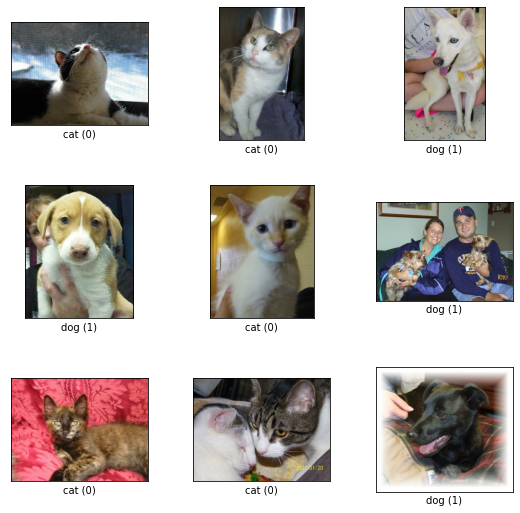

In [8]:
fig = tfds.show_examples(ds_train, ds_info)

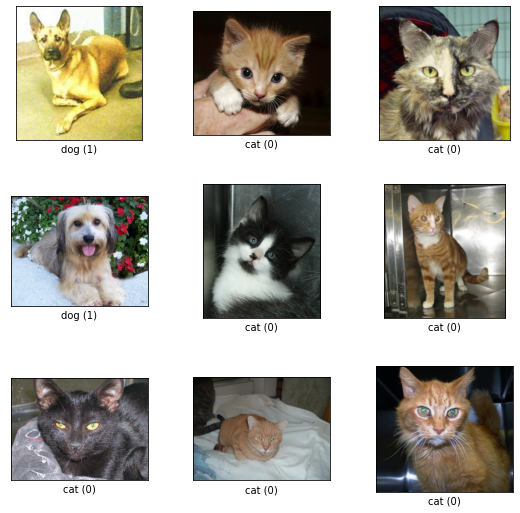

In [9]:
fig = tfds.show_examples(ds_test, ds_info)

In [10]:
# ResNet 기본 블록 구성

def build_resnet_residual(x, channel, kernel_size=3, stride=1, conv_shortcut=False, is_plain=False):
    # skip-connection
    if conv_shortcut:
        shortcut = layers.Conv2D(channel, 1, strides=stride, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    else:
        shortcut = x     
    
    # CNN layer
    if conv_shortcut:
        x1 = layers.Conv2D(filters=channel, kernel_size=3, strides=2, padding='same')(x)
    else:
        x1 = layers.Conv2D(channel, 3, strides=1, padding='same')(x)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)

    x1 = layers.Conv2D(channel, 3, strides=1, padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    
    if is_plain:
        x1 = layers.ReLU()(x1)
        return x1
    else:
        x = layers.Add()([x1, shortcut])
        x = layers.ReLU()(x)
        return x

In [11]:
def build_resnet_bottleneck(x, channel, kernel_size=3, stride=1, conv_shortcut=False, is_plain=False):
    # skip-connection
    if conv_shortcut:
        shortcut = layers.Conv2D(channel * 4, 1, strides=stride, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)

    else:
        shortcut = x
    
    # CNN layer
    if conv_shortcut:
        x1 = layers.Conv2D(channel, 1, strides=stride, padding='same')(x)
    else:
        x1 = layers.Conv2D(channel, 1, strides=1, padding='same')(x)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)

    x1 = layers.Conv2D(channel, 3, strides=1, padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.ReLU()(x1)
    
    x1 = layers.Conv2D(channel * 4, 1, strides=1, padding='same')(x1)
    x1 = layers.BatchNormalization()(x1)
    
    if is_plain:
        x1 = layers.ReLU()(x1)
        return x1
    else:
        x = layers.Add()([x1, shortcut])
        x = layers.ReLU()(x)
        return x

In [12]:
def build_resnet_blocks(input_layer, 
                        num_cnn=3, 
                        channel=64, 
                        strides=1,
                        block_num=0, 
                        is_plain=False, 
                        is_50=False):
    # input layer
    x = input_layer
    if is_50:
        for i in range(num_cnn):
            if block_num == 2 and i == 0:
                x = build_resnet_bottleneck(x, channel, conv_shortcut=True, is_plain=is_plain)
            elif block_num != 2 and i == 0:
                x = build_resnet_bottleneck(x, channel, stride=2, conv_shortcut=True, is_plain=is_plain)
            else:
                x = build_resnet_bottleneck(x, channel, is_plain=is_plain)
    else:
        for i in range(num_cnn):
            if block_num != 2 and i == 0:
                x = build_resnet_residual(x, channel, stride=2, conv_shortcut=True, is_plain=is_plain)
            else:
                x = build_resnet_residual(x, channel, is_plain=is_plain)
        
    return x

In [13]:

def build_resnet(input_shape=(224, 224, 3), 
                 num_cnn_list=[3, 4, 6, 3], 
                 channel_list=[64, 128, 256, 512], 
                 num_classes=10, 
                 is_plain=False, 
                 is_50=False):
    
    assert len(num_cnn_list) == len(channel_list)
    
    input_layer = layers.Input(shape=input_shape)
    output = input_layer
    
    # conv1
    output = layers.Conv2D(64, kernel_size=(7, 7), strides=2, padding='same', name='conv1')(output)
    output = layers.BatchNormalization()(output)
    output = layers.ReLU()(output)
    output = layers.MaxPool2D(pool_size=(3, 3), strides=2, padding='same', name='conv2_maxpool2d')(output)
    
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_resnet_blocks(output, 
                                    num_cnn=num_cnn, 
                                    channel=channel, 
                                    block_num=i+2,
                                    is_plain=is_plain,
                                    is_50=is_50)
        
    output = keras.layers.GlobalAveragePooling2D(name='average_pooling')(output)
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(inputs=input_layer, outputs=output)
    
    return model

## 2. ResNet-34, ResNet-50 Complete Model

In [14]:
# ResNet - 34 Residual

resnet34_residual = build_resnet(input_shape=(224, 224, 3), num_classes=2)

In [15]:
resnet34_residual.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 112, 112, 64) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

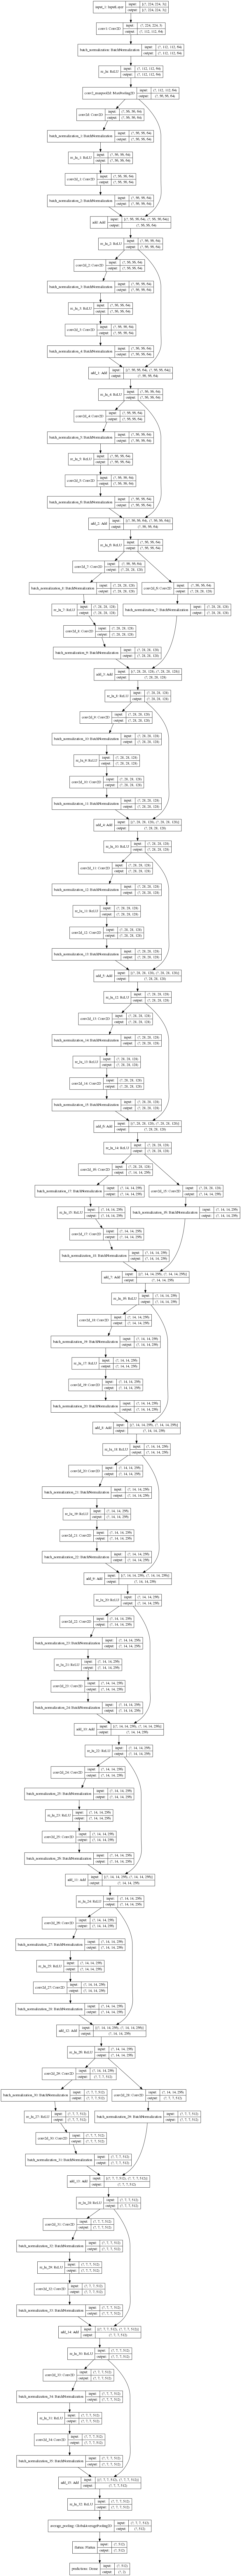

In [16]:
tf.keras.utils.plot_model(resnet34_residual, show_shapes=True, dpi=64)

In [17]:
# ResNet - 50 Residual

resnet50_residual = build_resnet(input_shape=(224, 224, 3), is_50=True, num_classes=2)

In [18]:
resnet50_residual.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
re_lu_33 (ReLU)                 (None, 112, 112, 64) 0           batch_normalization_36[0][0]     
_______________________________________________________________________________________

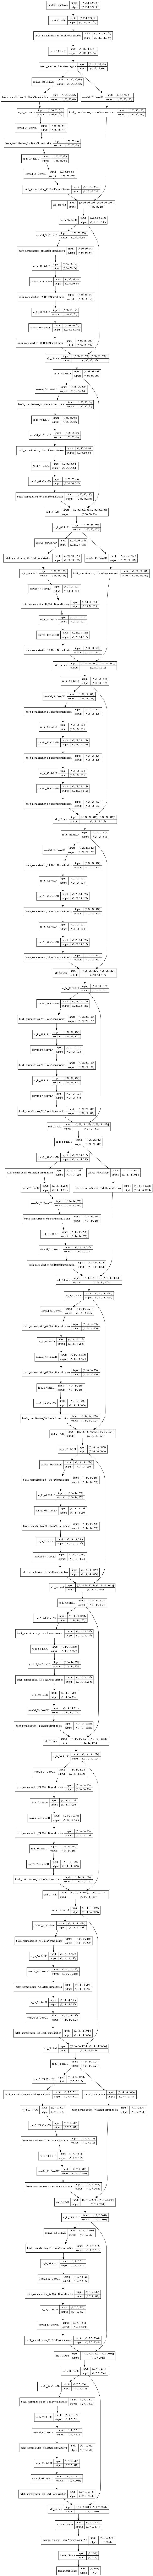

In [19]:
tf.keras.utils.plot_model(resnet50_residual, show_shapes=True, dpi=64)

## 3. 일반 네트워크(plain network) 만들기

In [20]:
# ResNet - 34 Plain

resnet34_plain = build_resnet(input_shape=(224, 224, 3), is_plain=True, num_classes=2)

In [21]:
resnet34_plain.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_89 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_82 (ReLU)              (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_maxpool2d (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
batch_normalization_90 (Batc (None, 56, 56, 64)       

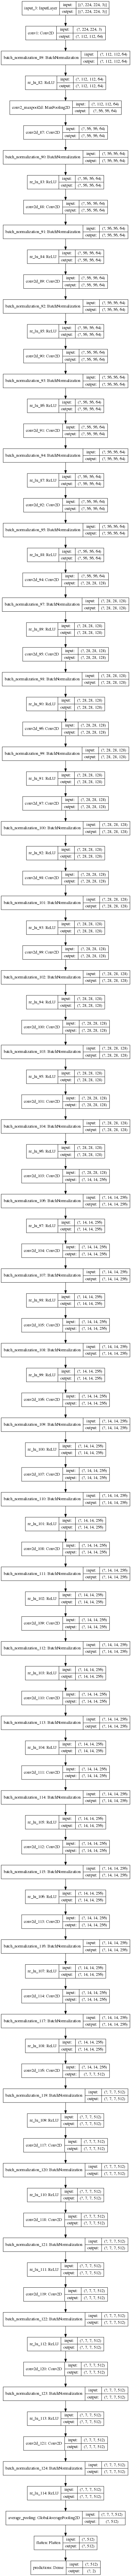

In [22]:
tf.keras.utils.plot_model(resnet34_plain, show_shapes=True, dpi=64)

In [23]:
# ResNet - 50 Plain

resnet50_plain = build_resnet(input_shape=(224, 224, 3), is_plain=True, is_50=True, num_classes=2)

In [24]:
resnet50_plain.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 64)      9472      
_________________________________________________________________
batch_normalization_125 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
re_lu_115 (ReLU)             (None, 112, 112, 64)      0         
_________________________________________________________________
conv2_maxpool2d (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 56, 56, 64)        4160      
_________________________________________________________________
batch_normalization_127 (Bat (None, 56, 56, 64)       

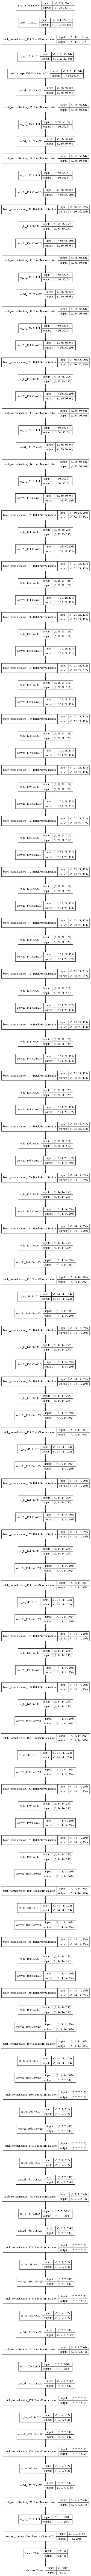

In [25]:
tf.keras.utils.plot_model(resnet50_plain, show_shapes=True, dpi=64)

## 4. ResNet - 50 vs Plain - 50 또는 ResNet - 34 vs Plain - 34

In [26]:
BATCH_SIZE = 32
EPOCH = 50

# cats_vs_dogs dataset load

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [27]:
# ResNet - 34 Residual

resnet34_residual.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_34_residual = resnet34_residual.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/50
581/581 [==============================] - 95s 164ms/step - loss: 0.6436 - accuracy: 0.6326 - val_loss: 0.7085 - val_accuracy: 0.5841
Epoch 2/50
581/581 [==============================] - 83s 143ms/step - loss: 0.5959 - accuracy: 0.6798 - val_loss: 0.7102 - val_accuracy: 0.5851
Epoch 3/50
581/581 [==============================] - 90s 154ms/step - loss: 0.5370 - accuracy: 0.7306 - val_loss: 0.7509 - val_accuracy: 0.6152
Epoch 4/50
581/581 [==============================] - 84s 144ms/step - loss: 0.4812 - accuracy: 0.7690 - val_loss: 0.5842 - val_accuracy: 0.7261
Epoch 5/50
581/581 [==============================] - 84s 145ms/step - loss: 0.4392 - accuracy: 0.7954 - val_loss: 0.4973 - val_accuracy: 0.7561
Epoch 6/50
581/581 [==============================] - 84s 145ms/step - loss: 0.3772 - accuracy: 0.8286 - val_loss: 0.7709 - val_accuracy: 0.6869
Epoch 7/50
581/581 [==============================] - 84s 145ms/step - loss: 0.3252 - accuracy: 0.8592 - val_loss: 0.9227 - val_ac

In [28]:
# ResNet - 34 Plain

resnet34_plain.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_34_plain = resnet34_plain.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/50
581/581 [==============================] - 82s 142ms/step - loss: 0.6926 - accuracy: 0.5576 - val_loss: 0.6948 - val_accuracy: 0.5442
Epoch 2/50
581/581 [==============================] - 83s 143ms/step - loss: 0.6847 - accuracy: 0.5699 - val_loss: 1.2047 - val_accuracy: 0.5132
Epoch 3/50
581/581 [==============================] - 82s 140ms/step - loss: 0.6587 - accuracy: 0.6106 - val_loss: 0.8736 - val_accuracy: 0.5290
Epoch 4/50
581/581 [==============================] - 82s 140ms/step - loss: 0.6512 - accuracy: 0.6187 - val_loss: 0.9417 - val_accuracy: 0.5453
Epoch 5/50
581/581 [==============================] - 82s 141ms/step - loss: 0.6417 - accuracy: 0.6317 - val_loss: 1.6190 - val_accuracy: 0.5099
Epoch 6/50
581/581 [==============================] - 82s 142ms/step - loss: 0.6340 - accuracy: 0.6384 - val_loss: 0.6786 - val_accuracy: 0.6147
Epoch 7/50
581/581 [==============================] - 82s 141ms/step - loss: 0.6259 - accuracy: 0.6487 - val_loss: 0.7131 - val_ac

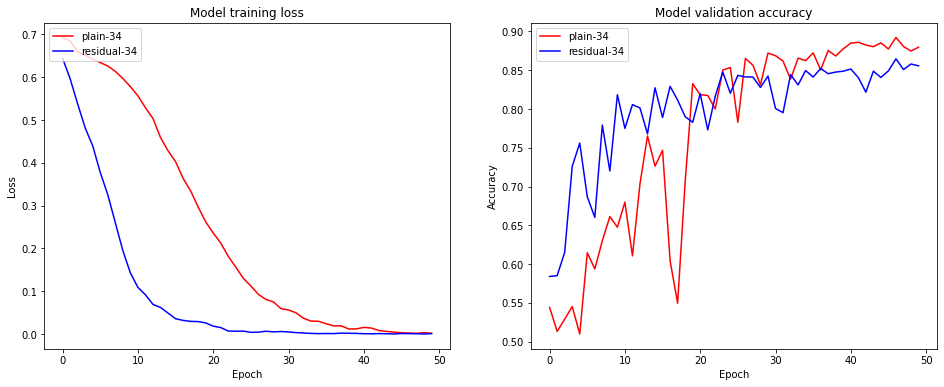

In [29]:
# ResNet - 34 Residual vs Plain 시각화
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_34_plain.history['loss'], 'r')
plt.plot(history_34_residual.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['plain-34', 'residual-34'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_34_plain.history['val_accuracy'], 'r')
plt.plot(history_34_residual.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain-34', 'residual-34'], loc='upper left')
plt.show()

In [30]:
# ResNet - 50 Residual

resnet50_residual.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_50_residual = resnet50_residual.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/50
581/581 [==============================] - 193s 331ms/step - loss: 0.7008 - accuracy: 0.5821 - val_loss: 0.7390 - val_accuracy: 0.5535
Epoch 2/50
581/581 [==============================] - 151s 260ms/step - loss: 0.6780 - accuracy: 0.6057 - val_loss: 1.8736 - val_accuracy: 0.5143
Epoch 3/50
581/581 [==============================] - 151s 261ms/step - loss: 0.6652 - accuracy: 0.6200 - val_loss: 0.9645 - val_accuracy: 0.5416
Epoch 4/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6560 - accuracy: 0.6290 - val_loss: 2.4129 - val_accuracy: 0.5170
Epoch 5/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6440 - accuracy: 0.6368 - val_loss: 0.7585 - val_accuracy: 0.5655
Epoch 6/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6421 - accuracy: 0.6385 - val_loss: 1.0616 - val_accuracy: 0.5219
Epoch 7/50
581/581 [==============================] - 151s 260ms/step - loss: 0.6354 - accuracy: 0.6484 - val_loss: 0.7348 -

In [31]:
# ResNet - 50 Plain
resnet50_plain.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_50_plain = resnet50_plain.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/50
581/581 [==============================] - 127s 219ms/step - loss: 0.7042 - accuracy: 0.5423 - val_loss: 0.7422 - val_accuracy: 0.5017
Epoch 2/50
581/581 [==============================] - 127s 219ms/step - loss: 0.7036 - accuracy: 0.5350 - val_loss: 0.8001 - val_accuracy: 0.4989
Epoch 3/50
581/581 [==============================] - 127s 219ms/step - loss: 0.6995 - accuracy: 0.5441 - val_loss: 0.7620 - val_accuracy: 0.5476
Epoch 4/50
581/581 [==============================] - 127s 219ms/step - loss: 0.7022 - accuracy: 0.5325 - val_loss: 1.1277 - val_accuracy: 0.4859
Epoch 5/50
581/581 [==============================] - 127s 219ms/step - loss: 0.7050 - accuracy: 0.5146 - val_loss: 0.8298 - val_accuracy: 0.5080
Epoch 6/50
581/581 [==============================] - 127s 218ms/step - loss: 0.7026 - accuracy: 0.5225 - val_loss: 0.6963 - val_accuracy: 0.5468
Epoch 7/50
581/581 [==============================] - 127s 219ms/step - loss: 0.6990 - accuracy: 0.5319 - val_loss: 0.7483 -

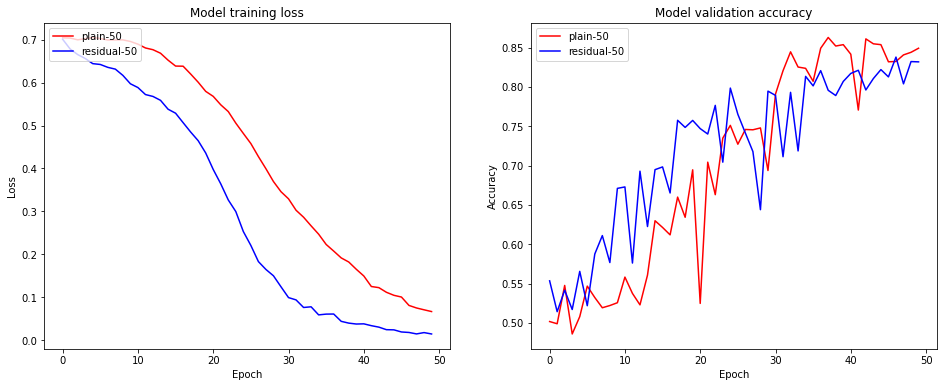

In [32]:
# ResNet - 50 Residual vs Plain 시각화

import matplotlib.pyplot as plt
figure = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_50_plain.history['loss'], 'r')
plt.plot(history_50_residual.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['plain-50', 'residual-50'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_50_plain.history['val_accuracy'], 'r')
plt.plot(history_50_residual.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['plain-50', 'residual-50'], loc='upper left')
plt.show()

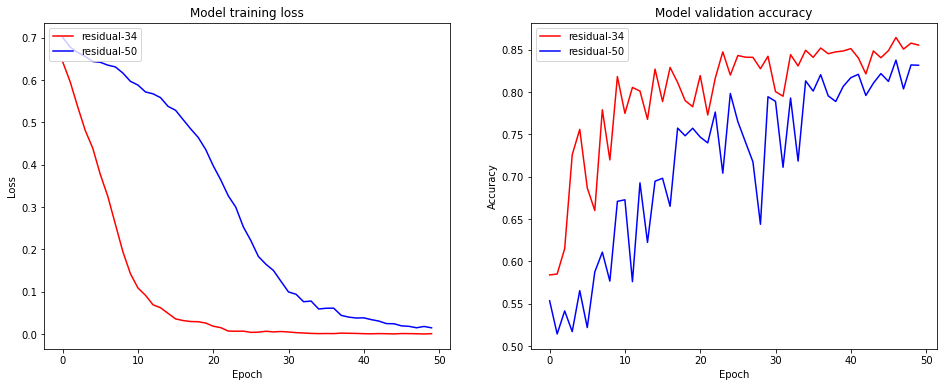

In [33]:
# ResNet - 34 vs 50  시각화


figure = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_34_residual.history['loss'], 'r')
plt.plot(history_50_residual.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['residual-34', 'residual-50'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_34_residual.history['val_accuracy'], 'r')
plt.plot(history_50_residual.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['residual-34', 'residual-50'], loc='upper left')
plt.show()

In [34]:
# Tensorflow 내장 ResNet - 50

resnet50 = tf.keras.applications.ResNet50(include_top=True, weights=None, input_shape=(224, 224, 3), classes=2)

In [35]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

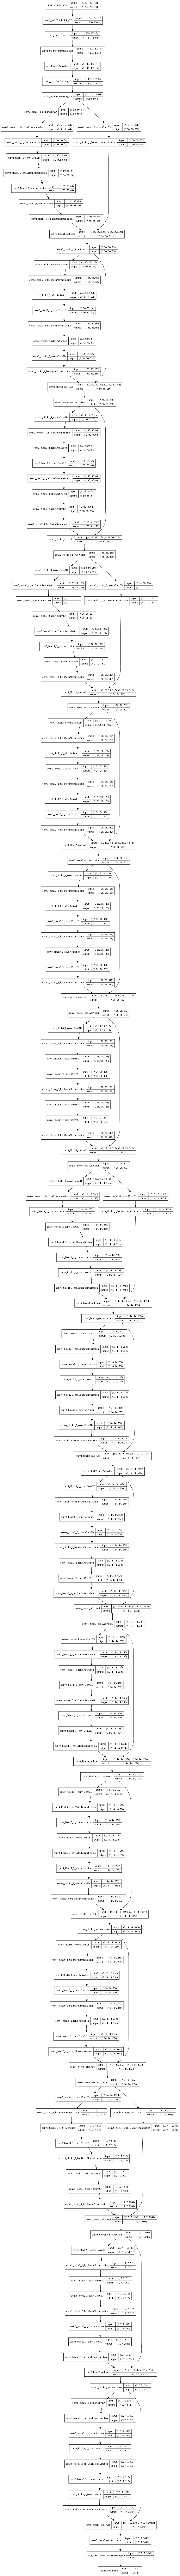

In [36]:
tf.keras.utils.plot_model(resnet50, show_shapes=True, dpi=64)

In [37]:
# ResNet - 50 Residual

resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_resnet_50 = resnet50.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train[:80%]'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['train[80%:]'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/50
581/581 [==============================] - 153s 263ms/step - loss: 0.7090 - accuracy: 0.5714 - val_loss: 0.8141 - val_accuracy: 0.5019
Epoch 2/50
581/581 [==============================] - 153s 263ms/step - loss: 0.6766 - accuracy: 0.6102 - val_loss: 0.7279 - val_accuracy: 0.5818
Epoch 3/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6680 - accuracy: 0.6202 - val_loss: 0.9492 - val_accuracy: 0.5203
Epoch 4/50
581/581 [==============================] - 151s 261ms/step - loss: 0.6586 - accuracy: 0.6264 - val_loss: 0.7668 - val_accuracy: 0.5695
Epoch 5/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6486 - accuracy: 0.6362 - val_loss: 1.8304 - val_accuracy: 0.5140
Epoch 6/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6394 - accuracy: 0.6465 - val_loss: 1.2894 - val_accuracy: 0.5189
Epoch 7/50
581/581 [==============================] - 152s 261ms/step - loss: 0.6306 - accuracy: 0.6500 - val_loss: 0.6635 -

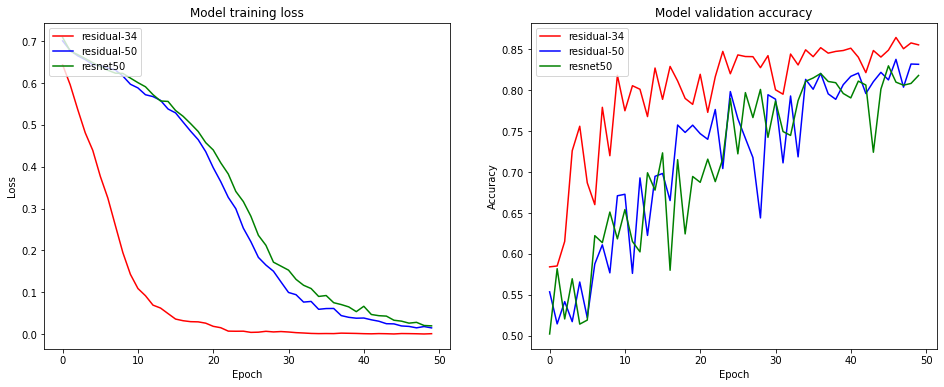

In [38]:
# 직접 구현한 모델과 내장 모델의 성능 비교

figure = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_34_residual.history['loss'], 'r')
plt.plot(history_50_residual.history['loss'], 'b')
plt.plot(history_resnet_50.history['loss'], 'g')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['residual-34', 'residual-50', 'resnet50'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_34_residual.history['val_accuracy'], 'r')
plt.plot(history_50_residual.history['val_accuracy'], 'b')
plt.plot(history_resnet_50.history['val_accuracy'], 'g')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['residual-34', 'residual-50', 'resnet50'], loc='upper left')
plt.show()